In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,vi_steady_value,rpp_minus_alpha
0,par-4-ms-7,parallel-4,0,7,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),6.201505,2429,10,10285,...,6.059972,31.430786,177,177,0.070241,2,0.119460,0.287979,27.078736,3.797886e-02
1,par-4-ms-7,parallel-4,0,7,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),5.990966,2429,10,10285,...,5.852546,31.426640,171,171,0.069429,2,0.119462,0.287939,27.074437,3.793945e-02
2,par-2-ms-6,parallel-2,0,6,"sm.SelfishMining(Parallel(k=2), alpha=0.125, g...",Parallel(k=2),3.511286,1658,7,6006,...,3.389888,30.981747,122,122,0.064575,2,0.129534,0.293868,27.547662,4.386774e-02
3,par-3-ms-6,parallel-3,0,6,"sm.SelfishMining(Parallel(k=3), alpha=0.125, g...",Parallel(k=3),1.546219,1271,8,4777,...,1.449615,13.383787,119,119,0.061683,2,0.048515,0.108551,8.915647,8.550939e-03
4,eth-3-ms-5,ethereum-wp-3,0,5,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),2.718631,1124,6,3082,...,2.628402,26.992040,81,81,0.064301,2,0.083333,0.250000,24.030254,-3.727574e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,par-2-ms-6,parallel-2,0,6,"sm.SelfishMining(Parallel(k=2), alpha=0.125, g...",Parallel(k=2),2.934278,1658,7,6006,...,2.895940,19.326277,103,103,0.002956,2,0.075808,0.172291,15.272990,2.229126e-02
212,eth-3-ms-5,ethereum-wp-3,0,5,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),3.621405,1124,6,3082,...,3.597167,31.793656,81,81,0.002316,2,0.100000,0.300000,29.028881,-4.568568e-14
213,eth-2-ms-6,ethereum-wp-2,0,6,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),3.452899,2987,6,10176,...,3.384314,8.694474,34,34,0.001385,2,0.025000,0.050000,3.988752,-1.174061e-14
214,eth-3-ms-5,ethereum-wp-3,0,5,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),2.938628,1124,6,3082,...,2.923266,31.793656,81,81,0.001640,2,0.100000,0.300000,29.028881,-4.568568e-14


In [3]:
data[(data.ss_reachable - data.ss_nonzero) != 0].drop(
    columns=["model_hum", "protocol_hum"]
)

,key,protocol,maximum_height,maximum_size,time,n_states,n_actions,n_transitions,alpha,gamma,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,vi_steady_value,rpp_minus_alpha
60,eth-2-ms-6,ethereum-wp-2,0,6,6.173124,2987,6,10176,0.2,0.5,...,6.098427,22.787133,34,33,0.001763,2,0.100000,0.2000,18.813913,-6.522560e-15
76,eth-2-ms-6,ethereum-wp-2,0,6,6.431912,2987,6,10176,0.2,1.0,...,6.330137,22.787133,34,33,0.001644,2,0.100000,0.2000,18.813913,-6.522560e-15
95,par-2-ms-6,parallel-2,0,6,2.385729,1658,7,6006,0.1,0.0,...,2.311683,13.377851,72,71,0.002271,2,0.051485,0.1087,8.967002,8.700000e-03
97,eth-2-ms-6,ethereum-wp-2,0,6,6.356752,2987,6,10176,0.2,0.0,...,6.277112,22.787133,34,33,0.001714,2,0.100000,0.2000,18.813913,-6.522560e-15
133,byz-2-ms-6,ethereum-bz-2,0,6,6.097852,2987,6,10176,0.2,0.0,...,6.033347,22.787133,34,33,0.001784,2,0.100000,0.2000,18.813913,-6.522560e-15
155,byz-2-ms-6,ethereum-bz-2,0,6,6.208755,2987,6,10176,0.2,0.5,...,6.143748,22.787133,34,33,0.001796,2,0.100000,0.2000,18.813913,-6.522560e-15
185,par-2-ms-6,parallel-2,0,6,2.165748,1658,7,6006,0.1,0.5,...,2.129133,13.377851,72,71,0.002435,2,0.051485,0.1087,8.967002,8.700000e-03
189,byz-2-ms-6,ethereum-bz-2,0,6,6.753268,2987,6,10176,0.2,1.0,...,6.687623,22.787133,34,33,0.002141,2,0.100000,0.2000,18.813913,-6.522560e-15


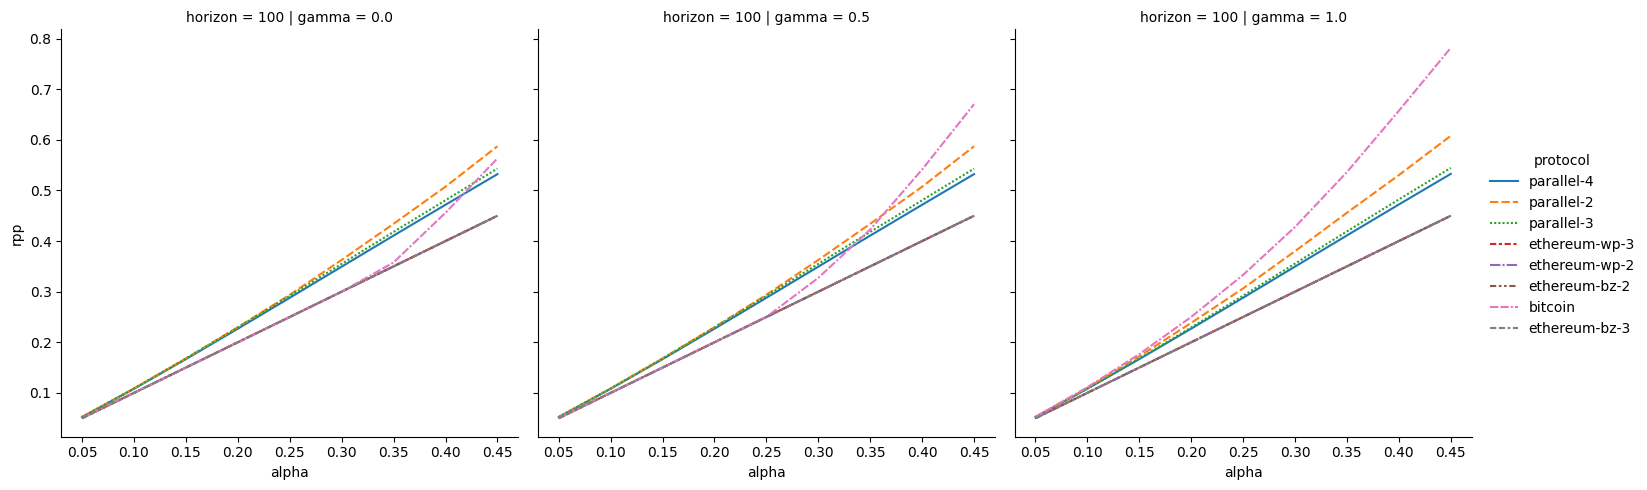

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

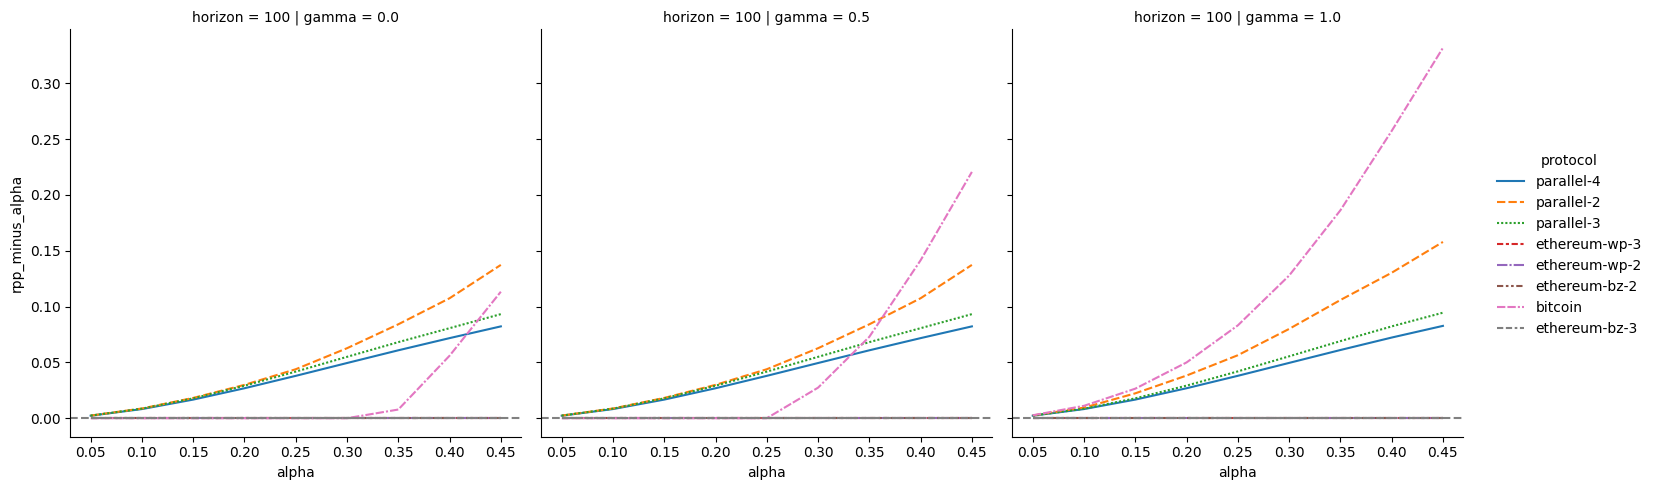

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
).refline(y=0)

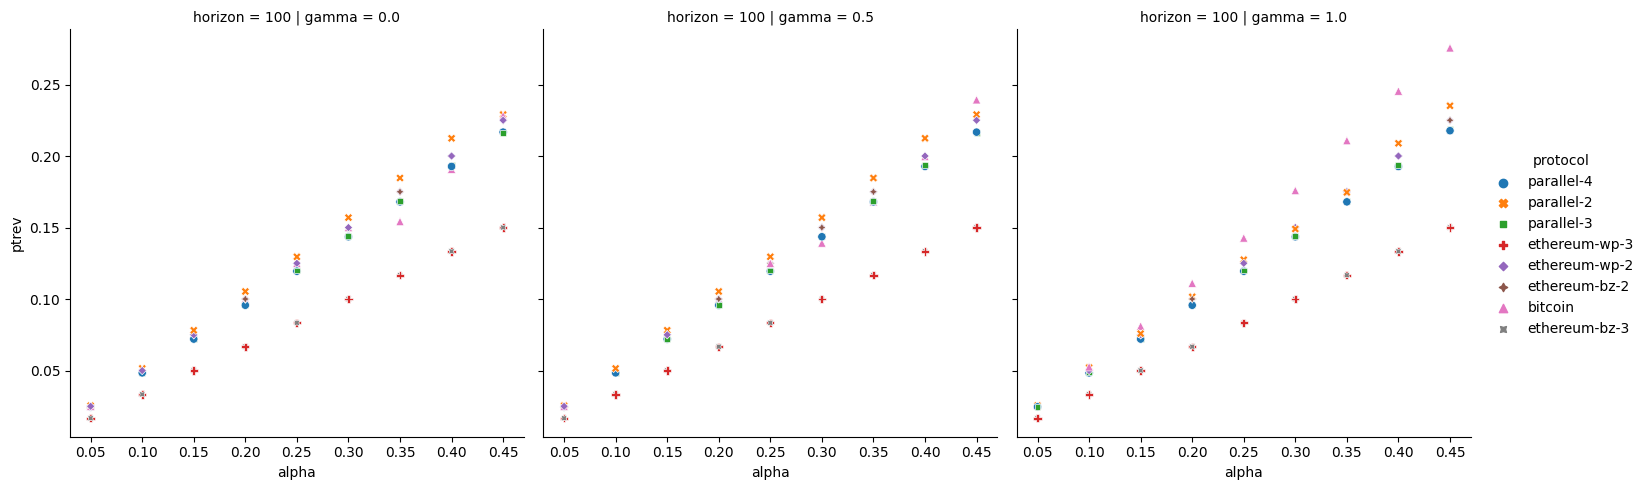

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="ptrev",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

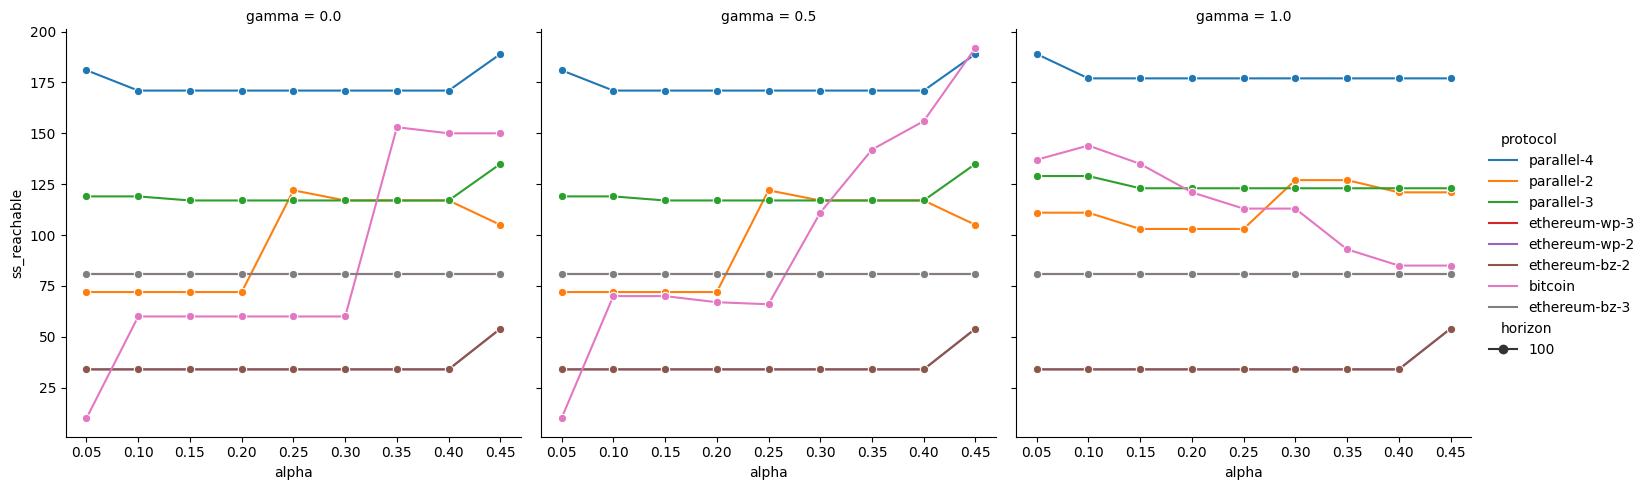

In [7]:
# Compare policy size
sns.relplot(
    data,
    x="alpha",
    y="ss_reachable",
    col="gamma",
    hue="protocol",
    style="horizon",
    kind="line",
    markers=True,
)